# Visualisasi Data Open Recruitment BEM KM

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
uploaded = files.upload()

Saving LeagueSpartan-Bold.ttf to LeagueSpartan-Bold.ttf


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Assuming you've uploaded the font using the files.upload() method as mentioned before
font_filename = "LeagueSpartan-Bold.ttf"  # Replace with your font filename

# Move the font file to a location where you have write permissions
#!mv {font_filename} /content/

# Use the custom font
font_path = f"/content/{font_filename}"
custom_font = FontProperties(fname=font_path, weight="bold")

## POST 1 : Analisis Kementrian-Kementrian Sekjen + Kemahasiswaan

2. Visualisasi fakultas Biro Pengembangan Sumber Daya Manusia & Biro Sekretaris Kabinet (VIAN)

Total Pengembangan Sumber Daya Manusia Applicants: 53

Count per Faculty:
Biologi                                  2.0
Ekonomika dan Bisnis                     2.0
Farmasi                                  1.0
Filsafat                                 1.0
Geografi                                 1.0
Hukum                                    4.0
Ilmu Budaya                              4.0
Ilmu Sosial dan Ilmu Politik            10.0
Kehutanan                                2.0
Matematika dan Ilmu Pengetahuan Alam     1.0
Pertanian                                5.0
Psikologi                                6.0
Sekolah Vokasi                           9.0
Teknik                                   3.0
Teknologi Pertanian                      2.0
Name: Fakultas, dtype: float64


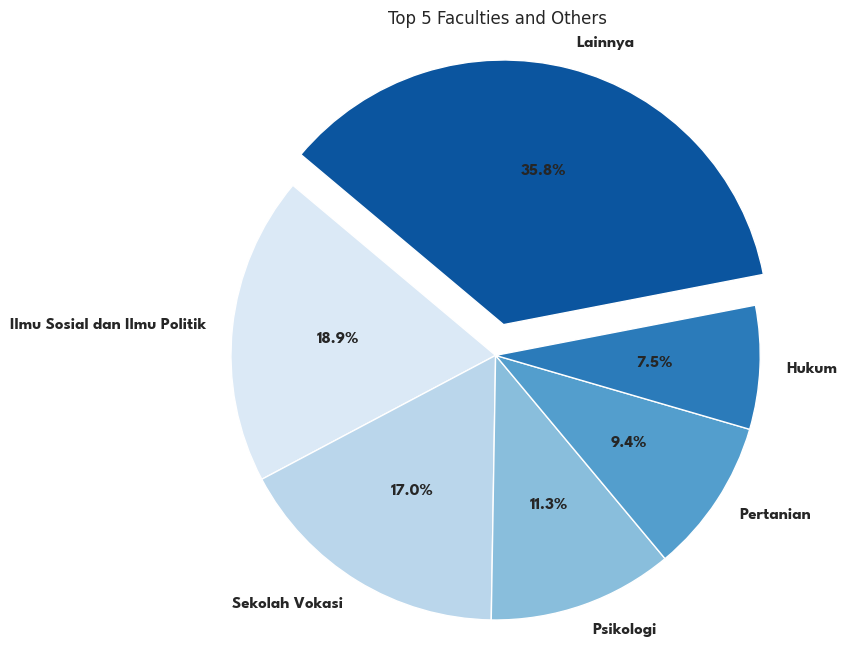

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/BEM/oprec_cleaned.csv")

# Filter applicants who chose "Pengembangan Sumber Daya Manusia" in either Field of Choice 1 or 2
PSDM_applicants = df[(df['Biro/Kementerian Pilihan 1'] == 'PSDM (Pengembangan Sumber Daya Manusia)')]
PSDM2_applicants = df[(df['Biro/Kementerian Pilihan 2'] == 'PSDM (Pengembangan Sumber Daya Manusia)')]

# Count the faculties of these applicants for each DataFrame
faculty_counts_PSDM = PSDM_applicants['Fakultas'].value_counts()
faculty_counts_PSDM2 = PSDM2_applicants['Fakultas'].value_counts()

# Combine the faculty counts from both DataFrames, filling NaN values with 0
faculty_counts_combined = faculty_counts_PSDM.add(faculty_counts_PSDM2, fill_value=0)

total_count = len(PSDM_applicants) + len(PSDM2_applicants)
print(f"Total Pengembangan Sumber Daya Manusia Applicants: {total_count}\n")

# Output the count per faculty
print("Count per Faculty:")
print(faculty_counts_combined)

# Compute the top 5 faculties
top_faculties = faculty_counts_combined.nlargest(5)

# Calculate the count of all other faculties as "Others"
other_count = faculty_counts_combined.sum() - top_faculties.sum()

# Create a new Series with top faculties and "Others"
faculty_data = {'Faculty': top_faculties.index, 'Count': top_faculties.values}
faculty_data['Faculty'] = faculty_data['Faculty'].tolist() + ['Lainnya']
faculty_data['Count'] = faculty_data['Count'].tolist() + [other_count]
top_and_others = pd.Series(faculty_data['Count'], index=faculty_data['Faculty'])

# Plot the data
colors = sns.color_palette('Blues')[0:len(top_and_others)]

plt.figure(figsize=(8, 8))
plt.pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Faculties and Others')
plt.show()


Total Sekretaris Kabinet Applicants: 21

Count per Faculty:
Biologi                                              1.0
Geografi                                             1.0
Hukum                                                4.0
Ilmu Sosial dan Ilmu Politik                         2.0
Kedokteran, Kesehatan Masyarakat, dan Keperawatan    1.0
Matematika dan Ilmu Pengetahuan Alam                 1.0
Psikologi                                            1.0
Sekolah Vokasi                                       6.0
Teknik                                               4.0
Name: Fakultas, dtype: float64


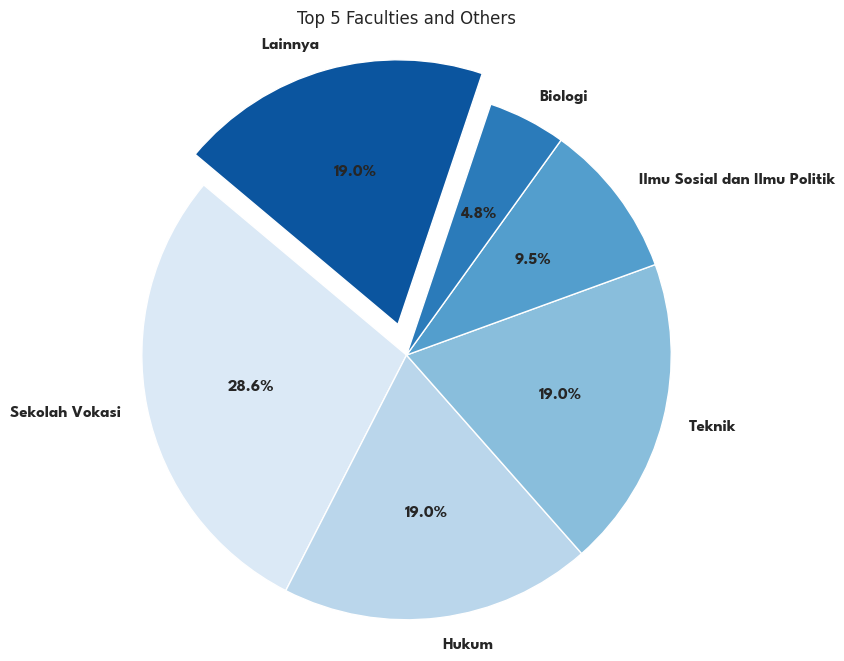

In [ ]:


SEKKAB_applicants = df[(df['Biro/Kementerian Pilihan 1'] == 'Sekkab (Sekretaris Kabinet)')]
SEKKAB2_applicants = df[(df['Biro/Kementerian Pilihan 2'] == 'Sekkab (Sekretaris Kabinet)')]

faculty_counts_SEKKAB= SEKKAB_applicants['Fakultas'].value_counts()
faculty_counts_SEKKAB2= SEKKAB2_applicants['Fakultas'].value_counts()

# Combine the faculty counts from both DataFrames, filling NaN values with 0
faculty_counts_combined = faculty_counts_SEKKAB.add(faculty_counts_SEKKAB2, fill_value=0)

total_count = len(SEKKAB_applicants) + len(SEKKAB2_applicants)
print(f"Total Sekretaris Kabinet Applicants: {total_count}\n")


print("Count per Faculty:")
print(faculty_counts_combined)

# Compute the top 5 faculties
top_faculties = faculty_counts_combined.nlargest(5)

# Calculate the count of all other faculties as "Others"
other_count = faculty_counts_combined.sum() - top_faculties.sum()

# Create a new Series with top faculties and "Others"
faculty_data = {'Faculty': top_faculties.index, 'Count': top_faculties.values}
faculty_data['Faculty'] = faculty_data['Faculty'].tolist() + ['Lainnya']
faculty_data['Count'] = faculty_data['Count'].tolist() + [other_count]
top_and_others = pd.Series(faculty_data['Count'], index=faculty_data['Faculty'])

# Plot the data
colors = sns.color_palette('Blues')[0:len(top_and_others)]

plt.figure(figsize=(8, 8))
plt.pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Faculties and Others')
plt.show()


3. Visualisasi fakultas Biro Keuangan & Biro Media dan Informasi (VIAN)

Total Keuangan Applicants: 31

Count per Faculty:
Ekonomika dan Bisnis                     1.0
Hukum                                    3.0
Ilmu Budaya                              3.0
Ilmu Sosial dan Ilmu Politik             2.0
Kedokteran Hewan                         1.0
Kehutanan                                3.0
Matematika dan Ilmu Pengetahuan Alam     1.0
Peternakan                               1.0
Sekolah Vokasi                          11.0
Teknik                                   4.0
Teknologi Pertanian                      1.0
Name: Fakultas, dtype: float64
Count per Faculty:
Ekonomika dan Bisnis                     1.0
Hukum                                    3.0
Ilmu Budaya                              3.0
Ilmu Sosial dan Ilmu Politik             2.0
Kedokteran Hewan                         1.0
Kehutanan                                3.0
Matematika dan Ilmu Pengetahuan Alam     1.0
Peternakan                               1.0
Sekolah Vokasi                          11.0


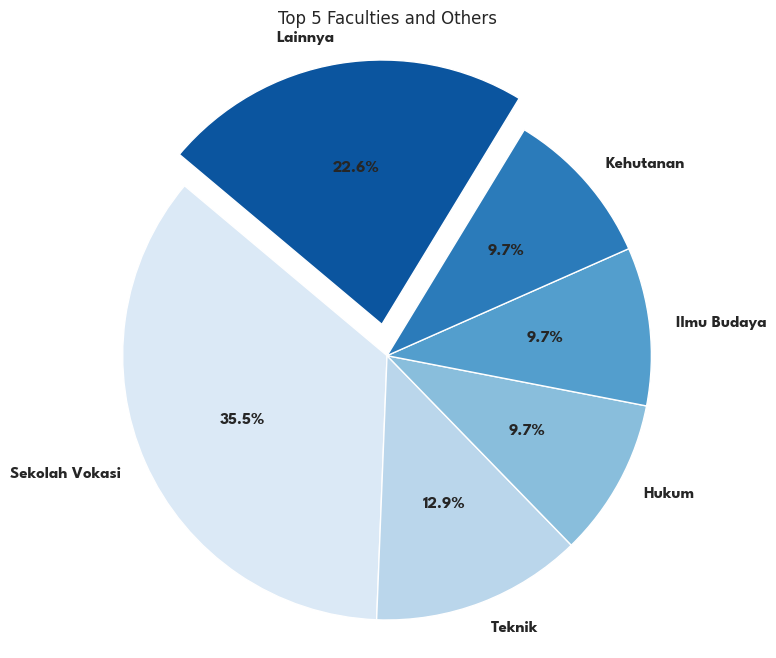

In [ ]:


KEUANGAN_applicants = df[(df['Biro/Kementerian Pilihan 1'] == 'Keuangan')]
KEUANGAN2_applicants = df[(df['Biro/Kementerian Pilihan 2'] == 'Keuangan')]


faculty_counts_KEUANGAN= KEUANGAN_applicants['Fakultas'].value_counts()
faculty_counts_KEUANGAN2= KEUANGAN2_applicants['Fakultas'].value_counts()

# Combine the faculty counts from both DataFrames, filling NaN values with 0
faculty_counts_combined = faculty_counts_KEUANGAN.add(faculty_counts_KEUANGAN2, fill_value=0)

total_count = len(KEUANGAN_applicants) + len(KEUANGAN2_applicants)
print(f"Total Keuangan Applicants: {total_count}\n")

""
print("Count per Faculty:")
print(faculty_counts_combined)


print("Count per Faculty:")
print(faculty_counts_combined)

# Compute the top 5 faculties
top_faculties = faculty_counts_combined.nlargest(5)

# Calculate the count of all other faculties as "Others"
other_count = faculty_counts_combined.sum() - top_faculties.sum()

# Create a new Series with top faculties and "Others"
faculty_data = {'Faculty': top_faculties.index, 'Count': top_faculties.values}
faculty_data['Faculty'] = faculty_data['Faculty'].tolist() + ['Lainnya']
faculty_data['Count'] = faculty_data['Count'].tolist() + [other_count]
top_and_others = pd.Series(faculty_data['Count'], index=faculty_data['Faculty'])

# Plot the data
colors = sns.color_palette('Blues')[0:len(top_and_others)]

plt.figure(figsize=(8, 8))
plt.pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Faculties and Others')
plt.show()


Total Medinfo Applicants: 12

Count per Faculty:
Biologi                                 1.0
Ilmu Budaya                             2.0
Matematika dan Ilmu Pengetahuan Alam    1.0
Pertanian                               1.0
Psikologi                               3.0
Sekolah Vokasi                          3.0
Teknik                                  1.0
Name: Fakultas, dtype: float64


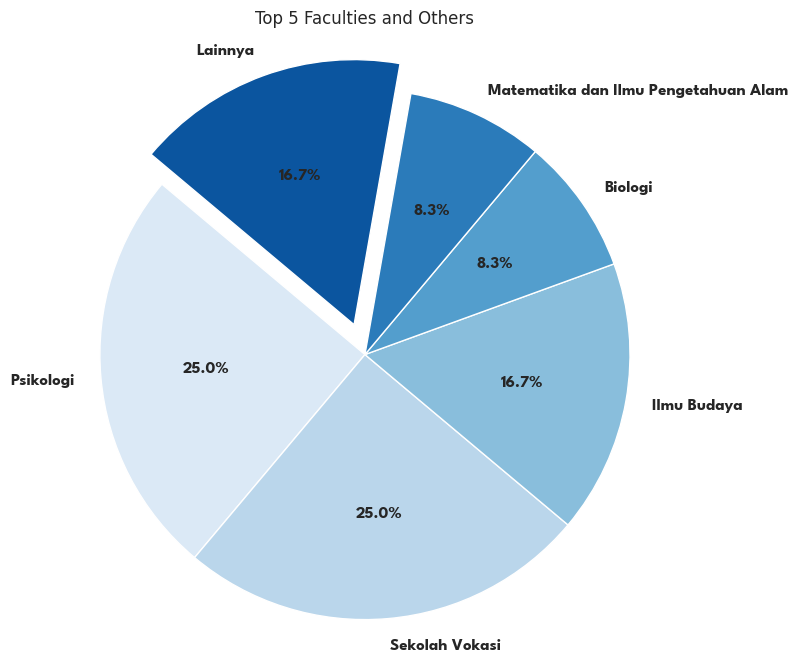

In [ ]:


MEDINFO_applicants = df[(df['Biro/Kementerian Pilihan 1'] == 'Medinfo (Media dan Informasi)')]
MEDINFO2_applicants = df[(df['Biro/Kementerian Pilihan 2'] == 'Medinfo (Media dan Informasi)')]


faculty_counts_MEDINFO= MEDINFO_applicants['Fakultas'].value_counts()
faculty_counts_MEDINFO2= MEDINFO2_applicants['Fakultas'].value_counts()

# Combine the faculty counts from both DataFrames, filling NaN values with 0
faculty_counts_combined = faculty_counts_MEDINFO.add(faculty_counts_MEDINFO2, fill_value=0)

total_count = len(MEDINFO_applicants) + len(MEDINFO2_applicants)
print(f"Total Medinfo Applicants: {total_count}\n")


print("Count per Faculty:")
print(faculty_counts_combined)

# Compute the top 5 faculties
top_faculties = faculty_counts_combined.nlargest(5)

# Calculate the count of all other faculties as "Others"
other_count = faculty_counts_combined.sum() - top_faculties.sum()

# Create a new Series with top faculties and "Others"
faculty_data = {'Faculty': top_faculties.index, 'Count': top_faculties.values}
faculty_data['Faculty'] = faculty_data['Faculty'].tolist() + ['Lainnya']
faculty_data['Count'] = faculty_data['Count'].tolist() + [other_count]
top_and_others = pd.Series(faculty_data['Count'], index=faculty_data['Faculty'])

# Plot the data
colors = sns.color_palette('Blues')[0:len(top_and_others)]

plt.figure(figsize=(8, 8))
plt.pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Faculties and Others')
plt.show()


### 5. Visualisasi Kementrian Advokasi dan Kesejahteraan Mahasiswa + Kementrian Ekonomi Kreatif

<ipython-input-37-0ce84004aaf9>:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adkesma_data = adkesma_data.append(pd.Series({'Lainnya': other_adkesma}))


Total Adkesma Applicants: 43

Count per Faculty:
Sekolah Vokasi                          8.0
Ilmu Budaya                             7.0
Ekonomika dan Bisnis                    5.0
Hukum                                   5.0
Filsafat                                3.0
Kehutanan                               3.0
Teknik                                  3.0
Ilmu Sosial dan Ilmu Politik            2.0
Pertanian                               2.0
Biologi                                 1.0
Farmasi                                 1.0
Geografi                                1.0
Matematika dan Ilmu Pengetahuan Alam    1.0
Psikologi                               1.0
Name: Fakultas, dtype: float64


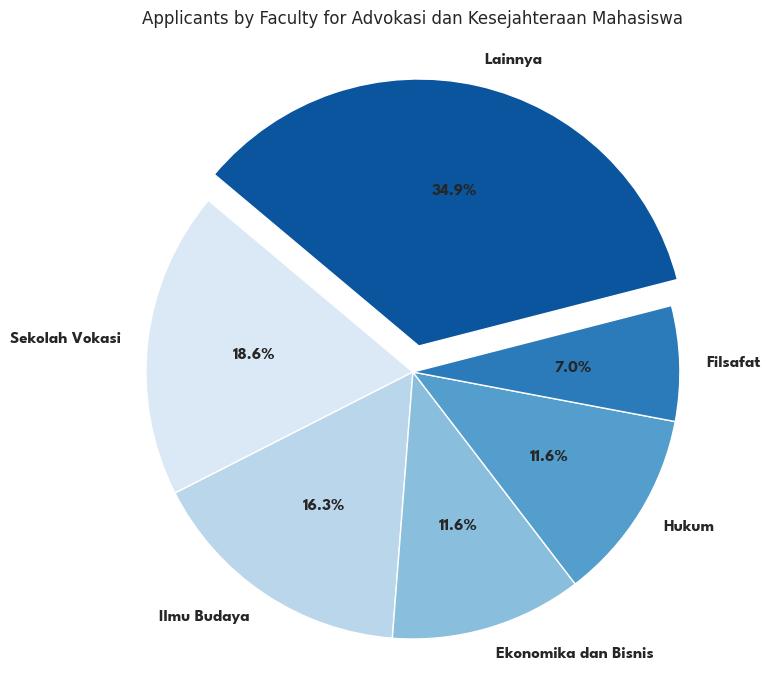

In [ ]:
# Filter applicants who chose "Adkesma" in either Field of Choice 1 or 2
Adkesma_applicants = df[(df['Biro/Kementerian Pilihan 1'] == 'Adkesma (Advokasi dan Kesejahteraan Mahasiswa)')]
Adkesma2_applicants = df[(df['Biro/Kementerian Pilihan 2'] == 'Adkesma (Advokasi dan Kesejahteraan Mahasiswa)')]

# Count the faculties of these applicants for each DataFrame
faculty_counts_Adkesma = Adkesma_applicants['Fakultas'].value_counts()
faculty_counts_Adkesma2 = Adkesma2_applicants['Fakultas'].value_counts()

# Combine the faculty counts from both DataFrames, filling NaN values with 0
faculty_counts_combined = faculty_counts_Adkesma.add(faculty_counts_Adkesma2, fill_value=0)

# Sort the values in descending order
faculty_counts_combined.sort_values(ascending=False, inplace=True)

# Create a new Series including the top 5 faculties and "Fakultas lainnya"
adkesma_data = faculty_counts_combined.head(5)
other_adkesma = faculty_counts_combined[5:].sum()
adkesma_data = adkesma_data.append(pd.Series({'Lainnya': other_adkesma}))

total_count = len(Adkesma_applicants) + len(Adkesma2_applicants)
print(f"Total Adkesma Applicants: {total_count}\n")

# Output the count per faculty
print("Count per Faculty:")
print(faculty_counts_combined)

# Create a pie chart for visualization
plt.figure(figsize=(8, 8))
plt.pie(adkesma_data, labels=adkesma_data.index, colors=sns.color_palette('Blues'), autopct='%1.1f%%', startangle = 140, explode=[0, 0, 0, 0, 0, 0.1], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Applicants by Faculty for Advokasi dan Kesejahteraan Mahasiswa', pad = 20)
plt.show()

<ipython-input-38-28f022be4c86>:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ekraf_data = ekraf_data.append(pd.Series({'Lainnya': other_ekraf}))


Total Ekraf Applicants: 22

Count per Faculty:
Sekolah Vokasi                          8.0
Ekonomika dan Bisnis                    3.0
Ilmu Budaya                             2.0
Matematika dan Ilmu Pengetahuan Alam    2.0
Teknik                                  2.0
Teknologi Pertanian                     2.0
Farmasi                                 1.0
Kehutanan                               1.0
Psikologi                               1.0
Name: Fakultas, dtype: float64


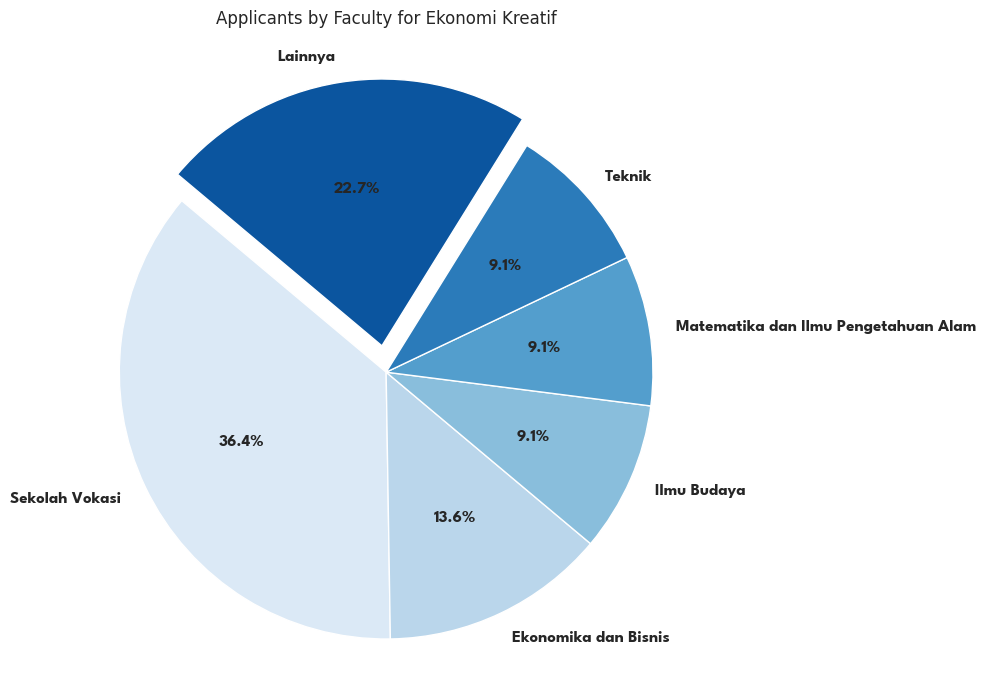

In [ ]:
# Filter applicants who chose "Adkesma" in either Field of Choice 1 or 2
Ekraf_applicants = df[(df['Biro/Kementerian Pilihan 1'] == 'Ekraf (Ekonomi Kreatif)')]
Ekraf2_applicants = df[(df['Biro/Kementerian Pilihan 2'] == 'Ekraf (Ekonomi Kreatif)')]

# Count the faculties of these applicants for each DataFrame
faculty_counts_Ekraf = Ekraf_applicants['Fakultas'].value_counts()
faculty_counts_Ekraf2 = Ekraf2_applicants['Fakultas'].value_counts()

# Combine the faculty counts from both DataFrames, filling NaN values with 0
faculty_counts_combined = faculty_counts_Ekraf.add(faculty_counts_Ekraf2, fill_value=0)

# Sort the values in descending order
faculty_counts_combined.sort_values(ascending=False, inplace=True)

# Create a new Series including the top 5 faculties and "Fakultas lainnya"
ekraf_data = faculty_counts_combined.head(5)
other_ekraf = faculty_counts_combined[5:].sum()
ekraf_data = ekraf_data.append(pd.Series({'Lainnya': other_ekraf}))

total_count = len(Ekraf_applicants) + len(Ekraf2_applicants)
print(f"Total Ekraf Applicants: {total_count}\n")

# Output the count per faculty
print("Count per Faculty:")
print(faculty_counts_combined)

# Create a pie chart for visualization
plt.figure(figsize=(8, 8))
plt.pie(ekraf_data, labels=ekraf_data.index, colors=sns.color_palette('Blues'), autopct='%1.1f%%', startangle = 140, explode=[0, 0, 0, 0, 0, 0.1], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Applicants by Faculty for Ekonomi Kreatif', pad = 20)
plt.show()

### 6. Visualisasi Kementrian Kesehatan Mental + Kementrian Panorama

In [ ]:
#Kementrian Kesehatan Mental dan Panorama
Kesmenpano = df[(df['Biro/Kementerian Pilihan 1'] == 'Kesmen (Kesehatan Mental)')]
Kesmenpano2 = df[(df['Biro/Kementerian Pilihan 1'] == 'Panorama (Pengembangan Inovasi dan Karya Mahasiswa)')]
Kesmenpano3 = df[(df['Biro/Kementerian Pilihan 2'] == 'Kesmen (Kesehatan Mental)')]
Kesmenpano4 = df[(df['Biro/Kementerian Pilihan 2'] == 'Panorama (Pengembangan Inovasi dan Karya Mahasiswa)')]

faculty_counts = Kesmenpano['Fakultas'].value_counts()
faculty_counts2 = Kesmenpano2['Fakultas'].value_counts()
faculty_counts3 = Kesmenpano3['Fakultas'].value_counts()
faculty_counts4 = Kesmenpano4['Fakultas'].value_counts()

combined_faculty = faculty_counts.add(faculty_counts2, fill_value=0)

combined_faculty.sort_values(ascending=False, inplace=True)

kese_data = combined_faculty.head(5)
other_kese = combined_faculty[5:].sum()
kese_data = kese_data.append(pd.Series({'Lainnya': other_kese}))

total_count = len(Kesmenpano) + len(Kesmenpano2) + len(Kesmenpano3) + len(Kesmenpano4)
print(f"Total Ekraf Applicants: {total_count}\n")

# Output the count per faculty
print("Count per Faculty:")
print(combined_faculty)


Total Ekraf Applicants: 77

Count per Faculty:
Ilmu Budaya                                          10.0
Sekolah Vokasi                                        7.0
Ilmu Sosial dan Ilmu Politik                          5.0
Psikologi                                             4.0
Hukum                                                 2.0
Matematika dan Ilmu Pengetahuan Alam                  2.0
Pertanian                                             2.0
Biologi                                               1.0
Farmasi                                               1.0
Kedokteran Hewan                                      1.0
Kedokteran, Kesehatan Masyarakat, dan Keperawatan     1.0
Kehutanan                                             1.0
Teknik                                                1.0
Name: Fakultas, dtype: float64


<ipython-input-39-813f436c22c7>:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kese_data = kese_data.append(pd.Series({'Lainnya': other_kese}))


In [ ]:
#Kementrian Kesehatan Mental
Kesmenpano = df[(df['Biro/Kementerian Pilihan 1'] == 'Kesmen (Kesehatan Mental)')]
Kesmenpano2 = df[(df['Biro/Kementerian Pilihan 2'] == 'Kesmen (Kesehatan Mental)')]


faculty_counts = Kesmenpano['Fakultas'].value_counts()
faculty_counts2 = Kesmenpano2['Fakultas'].value_counts()


combined_faculty = faculty_counts.add(faculty_counts2, fill_value=0)

total_count = len(Kesmenpano) + len(Kesmenpano2)
print(f"Total Sekretaris Kabinet Applicants: {total_count}\n")

print("Count per Faculty:")
print(combined_faculty)

Total Sekretaris Kabinet Applicants: 39

Count per Faculty:
Biologi                                              3.0
Farmasi                                              1.0
Hukum                                                1.0
Ilmu Budaya                                          7.0
Ilmu Sosial dan Ilmu Politik                         5.0
Kedokteran Hewan                                     2.0
Kedokteran, Kesehatan Masyarakat, dan Keperawatan    1.0
Matematika dan Ilmu Pengetahuan Alam                 2.0
Pertanian                                            2.0
Psikologi                                            6.0
Sekolah Vokasi                                       6.0
Teknik                                               3.0
Name: Fakultas, dtype: float64


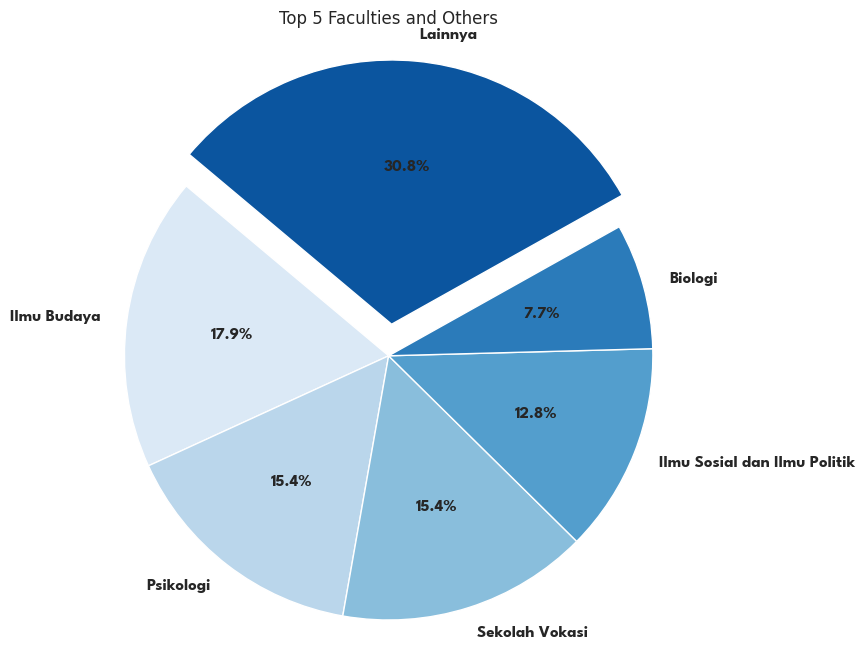

In [ ]:
colors = sns.color_palette('Blues')
sns.set(style='whitegrid')
# Compute the top 5 faculties
top_faculties = combined_faculty.nlargest(5)

# Calculate the count of all other faculties as "Others"
other_count = combined_faculty.sum() - top_faculties.sum()

# Create a new Series with top faculties and "Others"
faculty_data = {'Faculty': top_faculties.index, 'Count': top_faculties.values}
faculty_data['Faculty'] = faculty_data['Faculty'].tolist() + ['Lainnya']
faculty_data['Count'] = faculty_data['Count'].tolist() + [other_count]
top_and_others = pd.Series(faculty_data['Count'], index=faculty_data['Faculty'])

# Plot the data
colors = sns.color_palette('Blues')[0:len(top_and_others)]

plt.figure(figsize=(8, 8))
plt.pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Faculties and Others')
plt.show()


In [ ]:
Kesmenpano = df[(df['Biro/Kementerian Pilihan 1'] == 'Panorama (Pengembangan Inovasi dan Karya Mahasiswa)')]
Kesmenpano2 = df[(df['Biro/Kementerian Pilihan 2'] == 'Panorama (Pengenbangan Inovasi dan Karya Mahasiswa)')]

faculty_counts = Kesmenpano['Fakultas'].value_counts()
faculty_counts2 = Kesmenpano2['Fakultas'].value_counts()


combined_faculty = faculty_counts.add(faculty_counts2, fill_value=0)
combined_faculty = combined_faculty.add(faculty_counts3, fill_value=0)
combined_faculty = combined_faculty.add(faculty_counts4, fill_value=0)

combined_faculty = faculty_counts.add(faculty_counts2, fill_value=0)

total_count = len(Kesmenpano) + len(Kesmenpano2)
print(f"Total Sekretaris Kabinet Applicants: {total_count}\n")

print("Count per Faculty:")
print(combined_faculty)

Total Sekretaris Kabinet Applicants: 20

Count per Faculty:
Ilmu Budaya                                          6.0
Ilmu Sosial dan Ilmu Politik                         3.0
Sekolah Vokasi                                       3.0
Matematika dan Ilmu Pengetahuan Alam                 2.0
Psikologi                                            2.0
Kedokteran, Kesehatan Masyarakat, dan Keperawatan    1.0
Hukum                                                1.0
Pertanian                                            1.0
Kehutanan                                            1.0
Name: Fakultas, dtype: float64


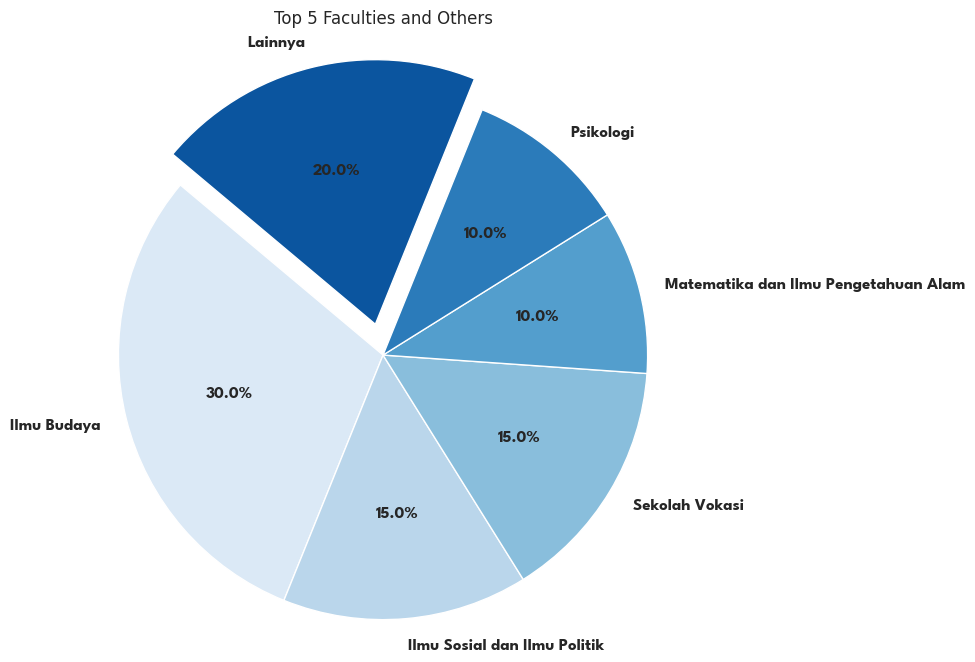

In [ ]:
colors = sns.color_palette('Blues')
sns.set(style='whitegrid')
# Compute the top 5 faculties
top_faculties = combined_faculty.nlargest(5)

# Calculate the count of all other faculties as "Others"
other_count = combined_faculty.sum() - top_faculties.sum()

# Create a new Series with top faculties and "Others"
faculty_data = {'Faculty': top_faculties.index, 'Count': top_faculties.values}
faculty_data['Faculty'] = faculty_data['Faculty'].tolist() + ['Lainnya']
faculty_data['Count'] = faculty_data['Count'].tolist() + [other_count]
top_and_others = pd.Series(faculty_data['Count'], index=faculty_data['Faculty'])

# Plot the data
colors = sns.color_palette('Blues')[0:len(top_and_others)]

plt.figure(figsize=(8, 8))
plt.pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Faculties and Others')
plt.show()


### 7. Visualisasi Kementrian PKK

In [ ]:
#PKK
PKK = df[(df['Biro/Kementerian Pilihan 1'] == 'PPK (Pengembangan Potensi dan Karier)')]
PKK2 = df[(df['Biro/Kementerian Pilihan 2'] == 'PPK (Pengenbangan Potensi dan Karier)')]

faculty_counts = PKK['Fakultas'].value_counts()
faculty_counts2 = PKK2['Fakultas'].value_counts()

combined_faculty = faculty_counts.add(faculty_counts2, fill_value=0)

total_count = len(PKK)+len(PKK2)
print(f"Total Sekretaris Kabinet Applicants: {total_count}\n")


print("Count per Faculty:")
print(combined_faculty)

Total Sekretaris Kabinet Applicants: 15

Count per Faculty:
Filsafat                                2.0
Matematika dan Ilmu Pengetahuan Alam    1.0
Peternakan                              1.0
Psikologi                               2.0
Sekolah Vokasi                          6.0
Teknik                                  3.0
Name: Fakultas, dtype: float64


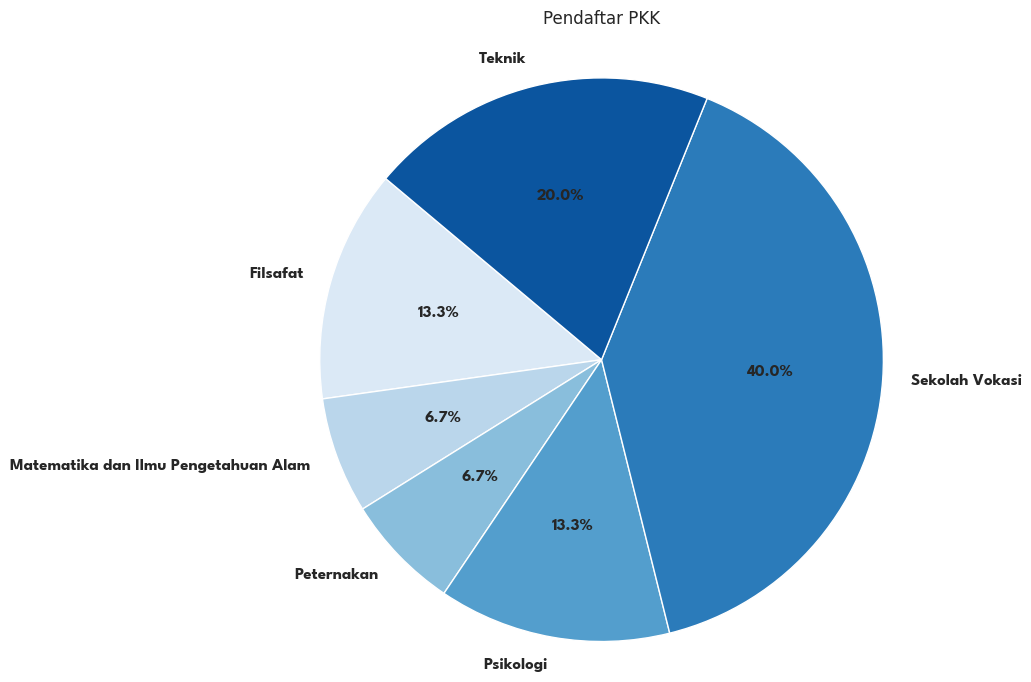

In [ ]:
colors = sns.color_palette('Blues')[0:]
sns.set(style='whitegrid')

plt.figure(figsize=(8, 8))
plt.pie(combined_faculty, labels=combined_faculty.index, autopct='%1.1f%%', startangle = 140, colors=colors, textprops={'fontproperties': custom_font})
plt.axis('equal')
plt.title('Pendaftar PKK', pad = 20)
plt.show()

## POST 2 : General

### 1. Total Pendaftar Per Angkatan

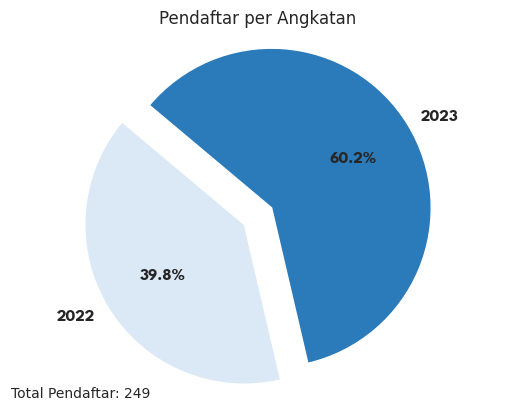

In [ ]:
custom_colors= ['#dbe9f6','#2b7bba']

# Filter and count the applicants for the years 2022 and 2023
applicants_2022 = df[df["2022"] == 1]
applicants_2023 = df[df['2023'] == 1]
total_applicants = len(df)

df.isnull().sum()
df.dropna(inplace=True)

# Calculate the counts
count_2022 = len(applicants_2022)
count_2023 = len(applicants_2023)

# Create a pie chart for visualization
labels = ['2022', '2023']
sizes = [count_2022, count_2023]
explode = (0.1, 0.1)  # Explode the 2022 and 2023 slices


fig, ax = plt.subplots()

plt.pie(sizes, explode=explode, labels=labels, colors=sns.color_palette(custom_colors), autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a text annotation for the total number of applicants
total_text = f"Total Pendaftar: {total_applicants}"
plt.annotate(total_text, xy=(-1.55, -1.15), fontsize=10, ha='left', va='bottom')

# Show the pie chart
plt.title('Pendaftar per Angkatan')
plt.show()


In [ ]:
df.head()

,Unnamed: 0,,Fakultas,Program Studi,Biro/Kementerian Pilihan 1,Biro/Kementerian Pilihan 2,2022,2023
0,0,9/1/2023 23:22,Biologi,BIOLOGI,PSDM (Pengembangan Sumber Daya Manusia),PDM (Pengembangan Desa Mitra),1,0
1,1,9/2/2023 13:52,Geografi,PEMBANGUNAN WILAYAH,PSDM (Pengembangan Sumber Daya Manusia),Sosmas (Sosial dan Masyarakat),0,1
2,2,9/2/2023 16:35,Matematika dan Ilmu Pengetahuan Alam,FISIKA,Sosmas (Sosial dan Masyarakat),Kesmen (Kesehatan Mental),0,1
3,3,9/2/2023 17:10,Kehutanan,SARJANA,Keuangan,Keuangan,1,0
4,4,9/3/2023 21:32,Filsafat,FILSAFAT,Adkesma (Advokasi dan Kesejahteraan Mahasiswa),PDM (Pengembangan Desa Mitra),0,1


<ipython-input-48-1ac9007c3e94>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pilsatu_data = top_pilihan.append(pd.Series({'Lainnya': other_pilihan}))


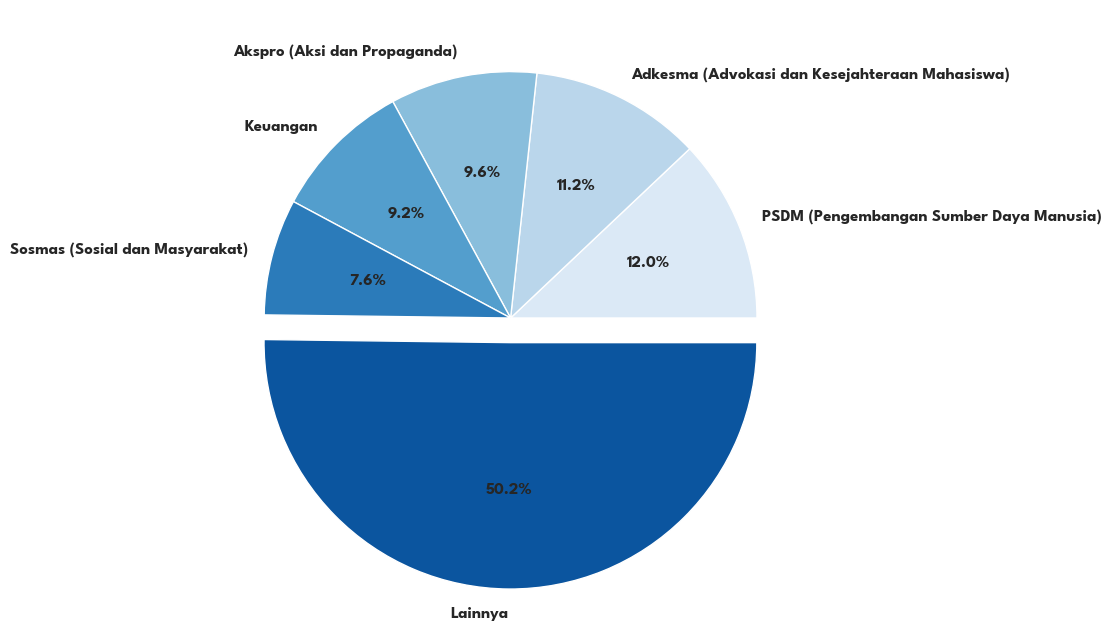

In [ ]:
# Count the occurrences of each faculty
pilsatu_counts = df["Biro/Kementerian Pilihan 1"].value_counts()

# Select the top 4 faculties and combine the rest into "Fakultas lainnya"
top_pilihan = pilsatu_counts.head(5)
other_pilihan = pilsatu_counts[5:].sum()

# Create a new Series including the top 4 faculties and "Fakultas lainnya"
pilsatu_data = top_pilihan.append(pd.Series({'Lainnya': other_pilihan}))

#Plotting chart
sns.set(font_scale = 1)
plt.figure(figsize=(8,8))

plt.pie(
    x=pilsatu_data,
    labels=pilsatu_data.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Blues'),
    textprops={'fontproperties': custom_font},
    explode=[0, 0, 0, 0, 0, 0.1]

    # Add space around each slice
)

plt.show()

### 2. Total Pendaftar Per-Bidang

Pergerakan: 34
Analisis: 21
Kemahasiswaan: 73
Kemasyarakatan: 33
Relasi: 16
Sekretaris Jenderal: 72


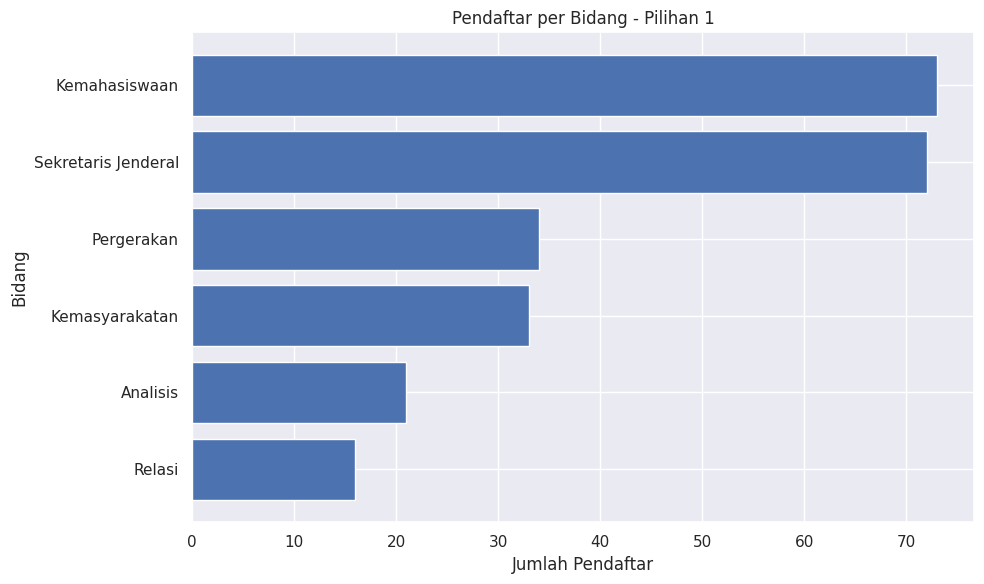

In [ ]:

# Define the mappings and conditions for each target value
mappings = {
    'Pergerakan': [
        'Akspro (Aksi dan Propaganda)',
        'Sokre (Sosial Kreatif)',
        'Ajarmas (Advokasi dan Jejaring Masyarakat)'
    ],
    'Analisis': [
        'Anstrat (Analisis Isu Strategis)',
        'Andal (Analisis Data dan Produk Digital)',
    ],
    'Kemahasiswaan': [
        'Kesmen (Kesehatan Mental)',
        'Adkesma (Advokasi dan Kesejahteraan Mahasiswa)',
        'PPK (Pengenbangan Potensi dan Karier)',
        'PPK (Pengembangan Potensi dan Karier)',
        'Panorama (Pengembangan Inovasi dan Karya Mahasiswa)',
        'Ekraf (Ekonomi Kreatif)'
    ],
    'Kemasyarakatan': [
        'Sosmas (Sosial dan Masyarakat)',
        'PDM (Pengembangan Desa Mitra)'
    ],
    'Relasi': [
        'Kolabin (Kolaborasi Internal)',
        'KOLABIN (Kolaborasi Internal)',
        'Hublu (Hubungan Luar)'
    ],
    'Sekretaris Jenderal' : [
        'PSDM (Pengembangan Sumber Daya Manusia)',
        'Sekkab (Sekretaris Kabinet)',
        'Medinfo (Media dan Informasi)',
        'Keuangan'
    ]
}

      ##### CHECK UNIQUE #####
# # Create a condition for rows that don't match any of the options in the mappings
# no_match_condition = ~df['Biro/Kementerian Pilihan 1'].isin([option for options in mappings.values() for option in options])

# # Print the values that don't fit any conditions above
# no_match_values = df[no_match_condition]['Biro/Kementerian Pilihan 1'].unique()
# print("Values that don't fit any conditions:")
# for value in no_match_values:
#     print(value)


# Initialize a dictionary to store counts
counts = {}

# Loop through the mappings and conditions, apply transformations, and store counts
for target_value, options in mappings.items():
    condition = df['Biro/Kementerian Pilihan 1'].isin(options)
    df.loc[condition, 'Biro/Kementerian Pilihan 1'] = target_value
    count = condition.sum()
    counts[target_value] = count
    print(f"{target_value}: {count}")

# Sort the counts in descending order
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=False))

# Create a horizontal bar chart to visualize the counts
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()))
plt.xlabel('Jumlah Pendaftar')
plt.ylabel('Bidang')
plt.title('Pendaftar per Bidang - Pilihan 1')
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


<ipython-input-50-1ac9007c3e94>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pilsatu_data = top_pilihan.append(pd.Series({'Lainnya': other_pilihan}))


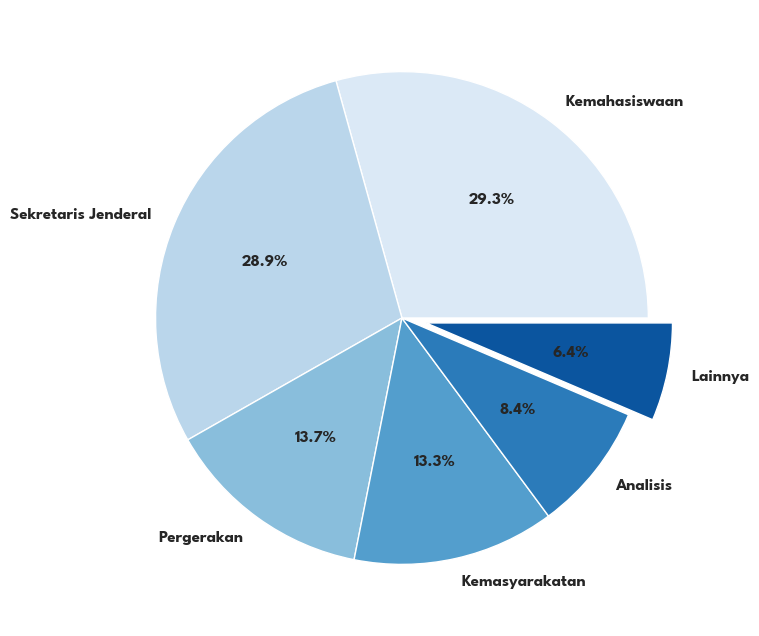

In [ ]:
# Count the occurrences of each faculty
pilsatu_counts = df["Biro/Kementerian Pilihan 1"].value_counts()

# Select the top 4 faculties and combine the rest into "Fakultas lainnya"
top_pilihan = pilsatu_counts.head(5)
other_pilihan = pilsatu_counts[5:].sum()

# Create a new Series including the top 4 faculties and "Fakultas lainnya"
pilsatu_data = top_pilihan.append(pd.Series({'Lainnya': other_pilihan}))

#Plotting chart
sns.set(font_scale = 1)
plt.figure(figsize=(8,8))

plt.pie(
    x=pilsatu_data,
    labels=pilsatu_data.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Blues'),
    textprops={'fontproperties': custom_font},
    explode=[0, 0, 0, 0, 0, 0.1]

    # Add space around each slice
)

plt.show()

<ipython-input-51-188eb2d59fdf>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pildua_data = top_pilihan2.append(pd.Series({'Lainnya': other_pilihan2}))


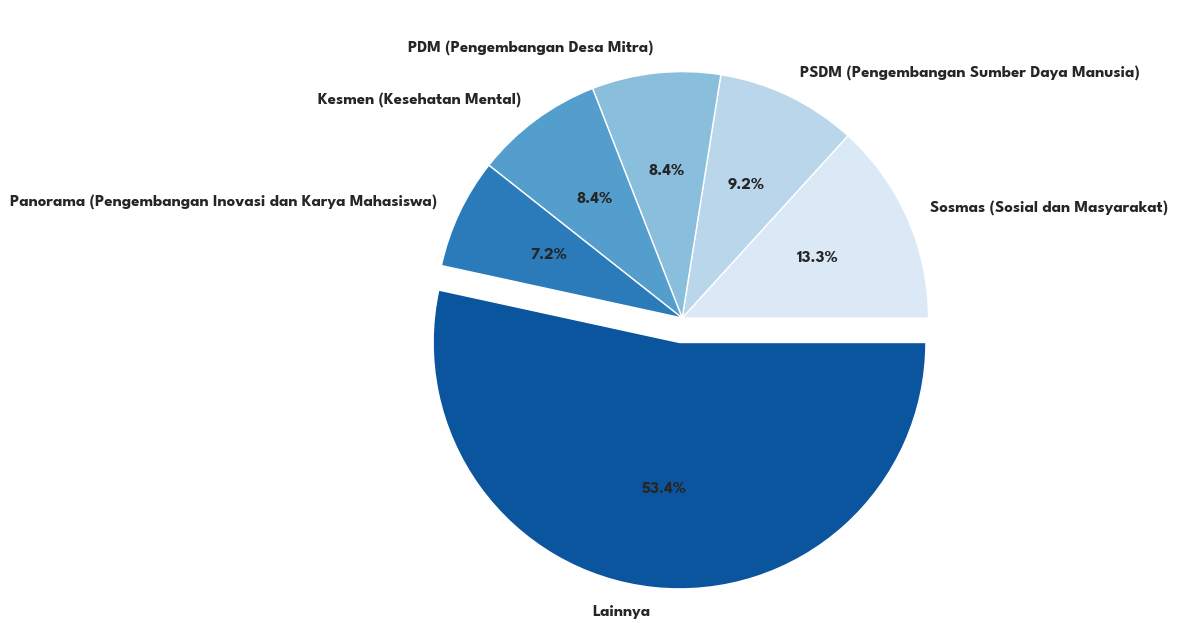

In [ ]:
# Count the occurrences of each faculty
pildua_counts = df["Biro/Kementerian Pilihan 2"].value_counts()

# Select the top 4 faculties and combine the rest into "Fakultas lainnya"
top_pilihan2 = pildua_counts.head(5)
other_pilihan2 = pildua_counts[5:].sum()

# Create a new Series including the top 4 faculties and "Fakultas lainnya"
pildua_data = top_pilihan2.append(pd.Series({'Lainnya': other_pilihan2}))

#Plotting chart
sns.set(font_scale = 1)
plt.figure(figsize=(8,8))

plt.pie(
    x=pildua_data,
    labels=pildua_data.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Blues'),
    textprops={'fontproperties': custom_font},
    explode=[0, 0, 0, 0, 0, 0.1]

    # Add space around each slice
)

plt.show()

### Top 3 Bidang Pil 1 + Top 3 Bidang Pil 2

In [ ]:


# Define the mappings and conditions for each target value
mappings = {
    'Pergerakan': [
        'Akspro (Aksi dan Propaganda)',
        'Sokre (Sosial Kreatif)',
        'Ajarmas (Advokasi dan Jejaring Masyarakat)'
    ],
    'Analisis': [
        'Anstrat (Analisis Isu Strategis)',
        'Andal (Analisis Data dan Produk Digital)',
    ],
    'Kemahasiswaan': [
        'Kesmen (Kesehatan Mental)',
        'Adkesma (Advokasi dan Kesejahteraan Mahasiswa)',
        'PPK (Pengenbangan Potensi dan Karier)',
        'PPK (Pengembangan Potensi dan Karier)',
        'Panorama (Pengembangan Inovasi dan Karya Mahasiswa)',
        'Ekraf (Ekonomi Kreatif)'
    ],
    'Kemasyarakatan': [
        'Sosmas (Sosial dan Masyarakat)',
        'PDM (Pengembangan Desa Mitra)'
    ],
    'Relasi': [
        'Kolabin (Kolaborasi Internal)',
        'KOLABIN (Kolaborasi Internal)',
        'Hublu (Hubungan Luar)'
    ],
    'Sekretaris Jenderal' : [
        'PSDM (Pengembangan Sumber Daya Manusia)',
        'Sekkab (Sekretaris Kabinet)',
        'Medinfo (Media dan Informasi)',
        'Keuangan'
    ]
}


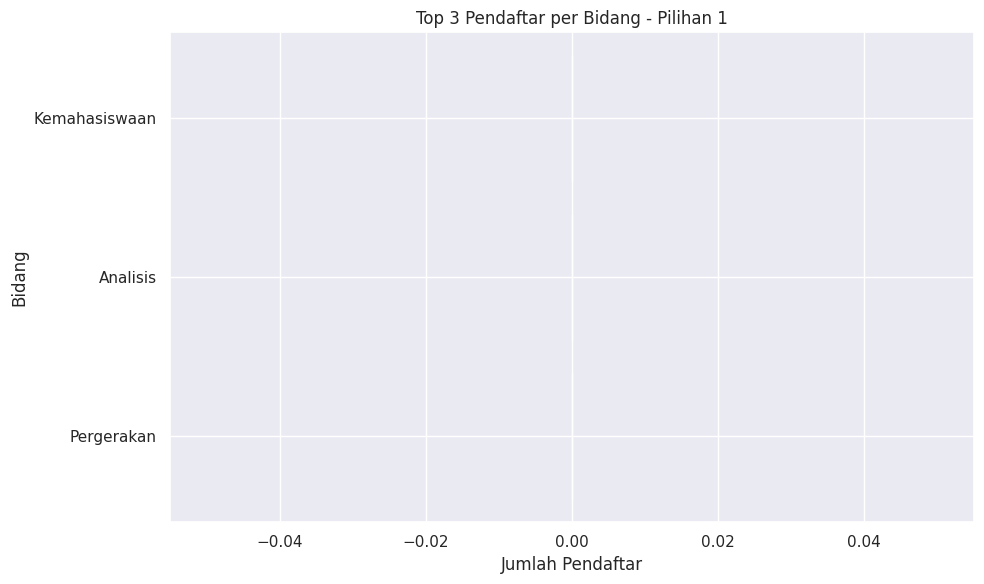

In [ ]:

# Initialize a dictionary to store counts
counts1 = {}


# Loop through the mappings and conditions, apply transformations, and store counts
for target_value, options in mappings.items():
    condition = df['Biro/Kementerian Pilihan 1'].isin(options)
    df.loc[condition, 'Biro/Kementerian Pilihan 1'] = target_value
    count = condition.sum()
    counts1[target_value] = count

#print()

sorted_counts1 = dict(sorted(counts1.items(), key=lambda item: item[1], reverse=False))


# Select the top 3 values from sorted_counts1 and sorted_counts2
top3_counts1 = dict(list(sorted_counts1.items())[:3])


# Create a horizontal bar chart to visualize the top 3 counts for Pilihan 1
plt.figure(figsize=(10, 6))
plt.barh(list(top3_counts1.keys()), list(top3_counts1.values()))
plt.xlabel('Jumlah Pendaftar')
plt.ylabel('Bidang')
plt.title('Top 3 Pendaftar per Bidang - Pilihan 1')
plt.tight_layout()

# Show the horizontal bar chart for Pilihan 1
plt.show()


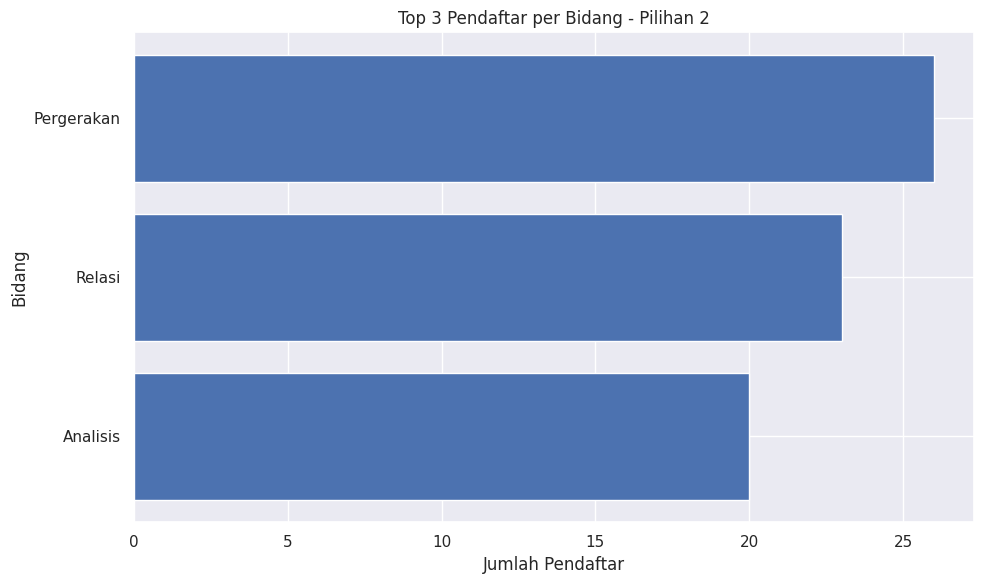

In [ ]:
counts2 = {}


for target_value, options in mappings.items():
    condition = df['Biro/Kementerian Pilihan 2'].isin(options)
    df.loc[condition, 'Biro/Kementerian Pilihan 2'] = target_value
    count = condition.sum()
    counts2[target_value] = count

sorted_counts2 = dict(sorted(counts2.items(), key=lambda item: item[1], reverse=False))

top3_counts2 = dict(list(sorted_counts2.items())[:3])



# Create a horizontal bar chart to visualize the top 3 counts for Pilihan 2
plt.figure(figsize=(10, 6))
plt.barh(list(top3_counts2.keys()), list(top3_counts2.values()))
plt.xlabel('Jumlah Pendaftar')
plt.ylabel('Bidang')
plt.title('Top 3 Pendaftar per Bidang - Pilihan 2')
plt.tight_layout()

# Show the horizontal bar chart for Pilihan 2
plt.show()


### 5. Top 5 Pendaftar kementrian pil 1

### 6. Top 5 pendaftar kementrian pil 2

### 7. Top 5 fakultas pendaftar terbanyak

In [ ]:
grouped_data = df.groupby('Fakultas')
name_counts = grouped_data.size().reset_index(name='Counts')
sorted_data = name_counts.sort_values(by='Counts', ascending=False)
print(sorted_data)

                                             Fakultas  Counts
15                                     Sekolah Vokasi      54
6                                         Ilmu Budaya      30
7                        Ilmu Sosial dan Ilmu Politik      30
5                                               Hukum      26
16                                             Teknik      17
14                                          Psikologi      13
11               Matematika dan Ilmu Pengetahuan Alam      12
0                                             Biologi      10
1                                Ekonomika dan Bisnis      10
3                                            Filsafat       9
10                                          Kehutanan       9
12                                          Pertanian       9
4                                            Geografi       6
17                                Teknologi Pertanian       4
13                                         Peternakan       3
2       

ValueError: ignored

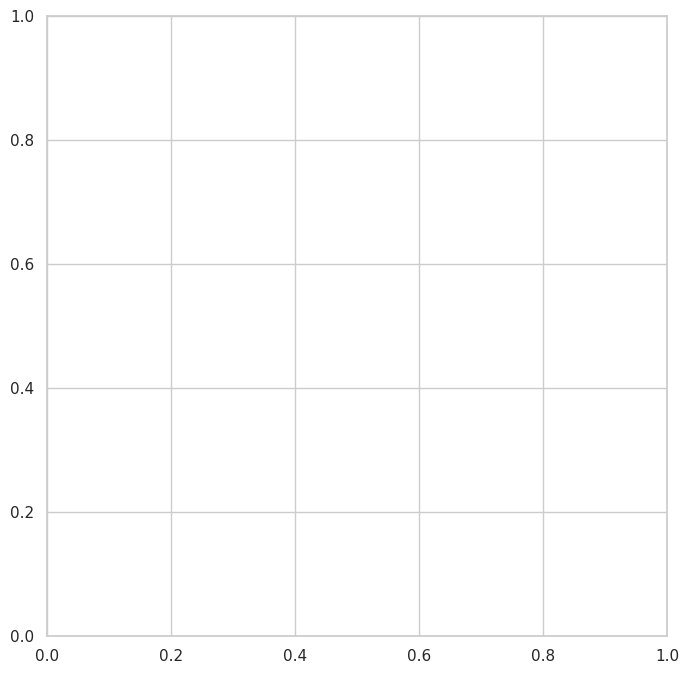

In [ ]:
top_5 = sorted_data.head(7)
lainnya = sorted_data.iloc[7:]
lainnya_total = lainnya['Counts'].sum()
lainnya_df = pd.DataFrame({'Fakultas': ['Lainnya'], 'Counts': [lainnya_total]})
top_5 = pd.concat([top_5, lainnya_df], ignore_index=True)


colors = sns.color_palette('Blues')[0:len(top_5)]

sns.set(style='whitegrid')

# sns.set_context("notebook", rc={"font.weight": "bold", "font.size": 30})

# Create a pie chart with custom colors
plt.figure(figsize=(8, 9))
plt.pie(top_5['Counts'], labels=top_5['Fakultas'], autopct='%1.1f%%', startangle=140,
        colors=colors, explode=[0, 0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

### 8. Top 5 prodi pendaftar terbanyak

In [ ]:
grouped_data = df.groupby('Program Studi')
name_counts = grouped_data.size().reset_index(name='Counts')
sorted_data = name_counts.sort_values(by='Counts', ascending=False)
print(sorted_data)

In [ ]:
top_5 = sorted_data.head(5)
lainnya = sorted_data.iloc[5:]
lainnya_total = lainnya['Counts'].sum()
lainnya_df = pd.DataFrame({'Program Studi': ['LAINNYA'], 'Counts': [lainnya_total]})
top_5 = pd.concat([top_5, lainnya_df], ignore_index=True)


colors = sns.color_palette('Blues')[0:len(top_5)]

sns.set(style='whitegrid')

#sns.set_context("notebook", rc={"font.weight": "bold", "font.size": 30})

# Create a pie chart with custom colors
plt.figure(figsize=(8, 9))
plt.pie(top_5['Counts'], labels=top_5['Program Studi'], autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0, 0, 0, 0, 0.12], textprops={'fontproperties': custom_font} )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()